# Logistic Regression Model
##### Authors: Diego Senso González, Luis Vaciero
##### 4 december 2020
##### Module: Machine Learning - Master's Degree Data Science for Finance

We are going to fit logistic regression model as our first model to predict loan_status. This is one of the most simple models, so we will fit it to get an idea about how good we can predict out Y. We hope to get good results, but we also expect that models like Random Forest and XGBoost obtain better accuracy than this.

## Libraries

We load required libraries to fit these models.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as sts
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from math import sqrt
import itertools
import math
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.datasets import make_classification
import random
random.seed(1234)
from sklearn.impute import KNNImputer
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

We load the objetive dataset.

In [35]:
loan = pd.read_csv("../notebooks/loan_lasso.csv", delimiter = ',')
loan

,Unnamed: 0,loan_status,num_rev_tl_bal_gt_0,D,sec_app_chargeoff_within_12_mths,dti,F,sec_app_inq_last_6mths,mort_acc,B,...,sec_app_open_acc,open_acc,sec_app_mort_acc,sec_app_open_act_il,G,A,policy_code,num_rev_accts,E,num_bc_sats
0,8,1.0,9.0,0,0.0,16.99,0,0.0,2.0,0,...,0.0,20.0,0.0,0.0,0,1,1.0,32.0,0,9.0
1,10,1.0,2.0,0,0.0,6.07,0,0.0,0.0,0,...,0.0,4.0,0.0,0.0,0,0,1.0,3.0,1,3.0
2,24,1.0,11.0,0,0.0,13.12,0,0.0,4.0,0,...,0.0,19.0,0.0,0.0,0,1,1.0,15.0,0,12.0
3,42,1.0,7.0,0,0.0,10.11,0,0.0,0.0,0,...,0.0,15.0,0.0,0.0,0,0,1.0,17.0,0,7.0
4,91,1.0,1.0,0,0.0,10.86,0,0.0,1.0,0,...,0.0,4.0,0.0,0.0,0,0,1.0,6.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462220,421088,1.0,7.0,1,0.0,27.08,0,0.0,0.0,0,...,0.0,9.0,0.0,0.0,0,0,1.0,13.0,0,7.0
462221,421089,0.0,8.0,0,0.0,23.69,0,0.0,1.0,1,...,0.0,13.0,0.0,0.0,0,0,1.0,20.0,0,4.0
462222,421092,0.0,6.0,1,0.0,30.90,0,0.0,0.0,0,...,0.0,9.0,0.0,0.0,0,0,1.0,10.0,0,4.0
462223,421093,0.0,7.0,0,0.0,27.19,0,0.0,0.0,0,...,0.0,17.0,0.0,0.0,0,0,1.0,16.0,1,7.0


We delete first columns, because it is not any of our variables and it is not useful information.

In [36]:
loan = loan.drop(loan.columns[[0]], axis='columns')
loan

,loan_status,num_rev_tl_bal_gt_0,D,sec_app_chargeoff_within_12_mths,dti,F,sec_app_inq_last_6mths,mort_acc,B,tax_liens,...,sec_app_open_acc,open_acc,sec_app_mort_acc,sec_app_open_act_il,G,A,policy_code,num_rev_accts,E,num_bc_sats
0,1.0,9.0,0,0.0,16.99,0,0.0,2.0,0,0.0,...,0.0,20.0,0.0,0.0,0,1,1.0,32.0,0,9.0
1,1.0,2.0,0,0.0,6.07,0,0.0,0.0,0,0.0,...,0.0,4.0,0.0,0.0,0,0,1.0,3.0,1,3.0
2,1.0,11.0,0,0.0,13.12,0,0.0,4.0,0,0.0,...,0.0,19.0,0.0,0.0,0,1,1.0,15.0,0,12.0
3,1.0,7.0,0,0.0,10.11,0,0.0,0.0,0,0.0,...,0.0,15.0,0.0,0.0,0,0,1.0,17.0,0,7.0
4,1.0,1.0,0,0.0,10.86,0,0.0,1.0,0,0.0,...,0.0,4.0,0.0,0.0,0,0,1.0,6.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462220,1.0,7.0,1,0.0,27.08,0,0.0,0.0,0,0.0,...,0.0,9.0,0.0,0.0,0,0,1.0,13.0,0,7.0
462221,0.0,8.0,0,0.0,23.69,0,0.0,1.0,1,0.0,...,0.0,13.0,0.0,0.0,0,0,1.0,20.0,0,4.0
462222,0.0,6.0,1,0.0,30.90,0,0.0,0.0,0,0.0,...,0.0,9.0,0.0,0.0,0,0,1.0,10.0,0,4.0
462223,0.0,7.0,0,0.0,27.19,0,0.0,0.0,0,0.0,...,0.0,17.0,0.0,0.0,0,0,1.0,16.0,1,7.0


## Model

### Fitting

We separate the dataset in X and Y variables to create training set and test set after.

In [37]:
# endogena

endogena = ['loan_status'] 

# exogenas

exogenas = list(set(list(loan.columns))-set(endogena))

X = loan[exogenas].values
Y = loan[endogena].values

We take a sample using SMOTE function which was imported previously. This will use 20% to test set and the rest 80% for train test. After this we see the dimensions of each set of data. Our model will train with 387126 variables and will try to predict 92445 different loans.

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
sm = SMOTE(random_state=40, sampling_strategy = 0.4)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
print(X_train.shape); print(X_test.shape)

(387126, 23)
(92445, 23)


Now we set our Y variable in test and train set and we see how many clients of each type there are in each set. We see that there is some difference but we do not consider that we have a huge desbalanced dataset.

In [39]:
ytrain_df = pd.DataFrame(Y_train, columns = ['loan_status'])
ytest_df = pd.DataFrame(Y_test, columns = ['loan_status'])

In [40]:
ytrain_df['loan_status'].value_counts(normalize=True)

1.0    0.714287
0.0    0.285713
Name: loan_status, dtype: float64

In [41]:
ytest_df['loan_status'].value_counts(normalize=True)

1.0    0.745881
0.0    0.254119
Name: loan_status, dtype: float64

The model is trained.

In [9]:
%%time
logit_loan = LogisticRegression(random_state=40, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500)
logit_loan.fit(X_train, Y_train)
logit_probs = logit_loan.predict_proba(X_train)
logit_scores = logit_probs[:,1]

Wall time: 3min 18s


C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [19]:
logit_loan

LogisticRegression(class_weight='balanced', max_iter=500, penalty='l1',
                   random_state=40, solver='saga')

Now we can see the precision of the model predicting people who pay and people who do not. Logistic Regression model has a precision of 85% trying to predict borrowers who pay the loan back, but it has only a 37% saying which loans will not be given back.

In [10]:
pred_logit = logit_loan.predict(X_test)
print(confusion_matrix(Y_test, pred_logit))
print(classification_report(Y_test, pred_logit))

[[16221  7271]
 [27581 41372]]
              precision    recall  f1-score   support

         0.0       0.37      0.69      0.48     23492
         1.0       0.85      0.60      0.70     68953

    accuracy                           0.62     92445
   macro avg       0.61      0.65      0.59     92445
weighted avg       0.73      0.62      0.65     92445



We see the AUC indicator which is 0.7, which is not bad. Under the plot we can see the total score of the model: 62.29%. This value could be better, but this is just the first model, so we hope to obtain better results from next ones.

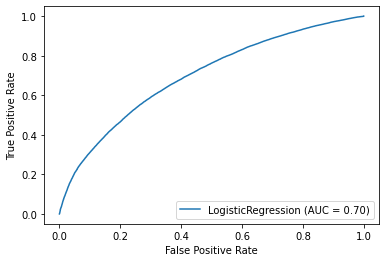

Logistic Regression score train:  0.6248895708374018
Logistic Regression score:  0.622997457947969


In [11]:
metrics.plot_roc_curve(logit_loan, X_test, Y_test)
plt.show()                    
print("Logistic Regression score train: ", logit_loan.score(X_train, Y_train))
print("Logistic Regression score: ", logit_loan.score(X_test, Y_test))

### Saving

Now we save the model in order to use for different dataset from the given ones. This will save a lot of time because it will not be necessary to wait to train the model again.

In [21]:
#We import pickle to save the model and use it later with new data
import pickle
filename = 'logistic.sav'
pickle.dump(logit_loan, open (filename, 'wb'))
model = pickle.load(open('model.sav', 'rb'))
model

LogisticRegression(class_weight='balanced', max_iter=500, penalty='l1',
                   random_state=40, solver='saga')

### Loading and predicting new data

With this code we will be able to load the model we saved in the last step and apply it to new data. When we load the new data we will be able to check the accuracy predicting the new observations.

In [42]:
#Load model and obtain accuracy for new dataset
model = pickle.load(open('logistic.sav', 'rb'))
result = model2.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result * 100.0))

Accuracy: 62.30%
